# **`Project-1`**
#### **`Classification Project:`** **You will find the project description in a doc file. Late submission won't be accepted. You will get the certificate only if you submit the project on time.**

## **`#1 Importing Necessary Libraries`**

In [50]:
import gensim as gs
import gradio as gr
import joblib as jb
import numpy as np
import pandas as pd
import pickle as pk
import seaborn as sns
import sklearn.cluster as cluster
import string as st
import warnings
from gensim.models import Word2Vec
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from IPython.display import Image
from kneed import KneeLocator
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize as stt
from nltk.tokenize import word_tokenize as wtt
from pandas.core.dtypes.common import is_numeric_dtype as is_num
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification as mc
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import f_classif as fcf
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split as tts
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
warnings.filterwarnings("ignore")

## **`#2 Loading The Dataset`**

In [51]:
df = pd.read_excel('Heart Disease.xlsx')

## **`#3.1 Exploratory Data Analysis (EDA)`**

In [52]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [53]:
df.shape

(319795, 18)

In [54]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [55]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth        int64
MentalHealth          int64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime             int64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [56]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [58]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [59]:
df.corr(numeric_only = True)

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


In [60]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

## **`#3.2 Dataset Visualization`**

### **`#3.2.1 Histplot`**

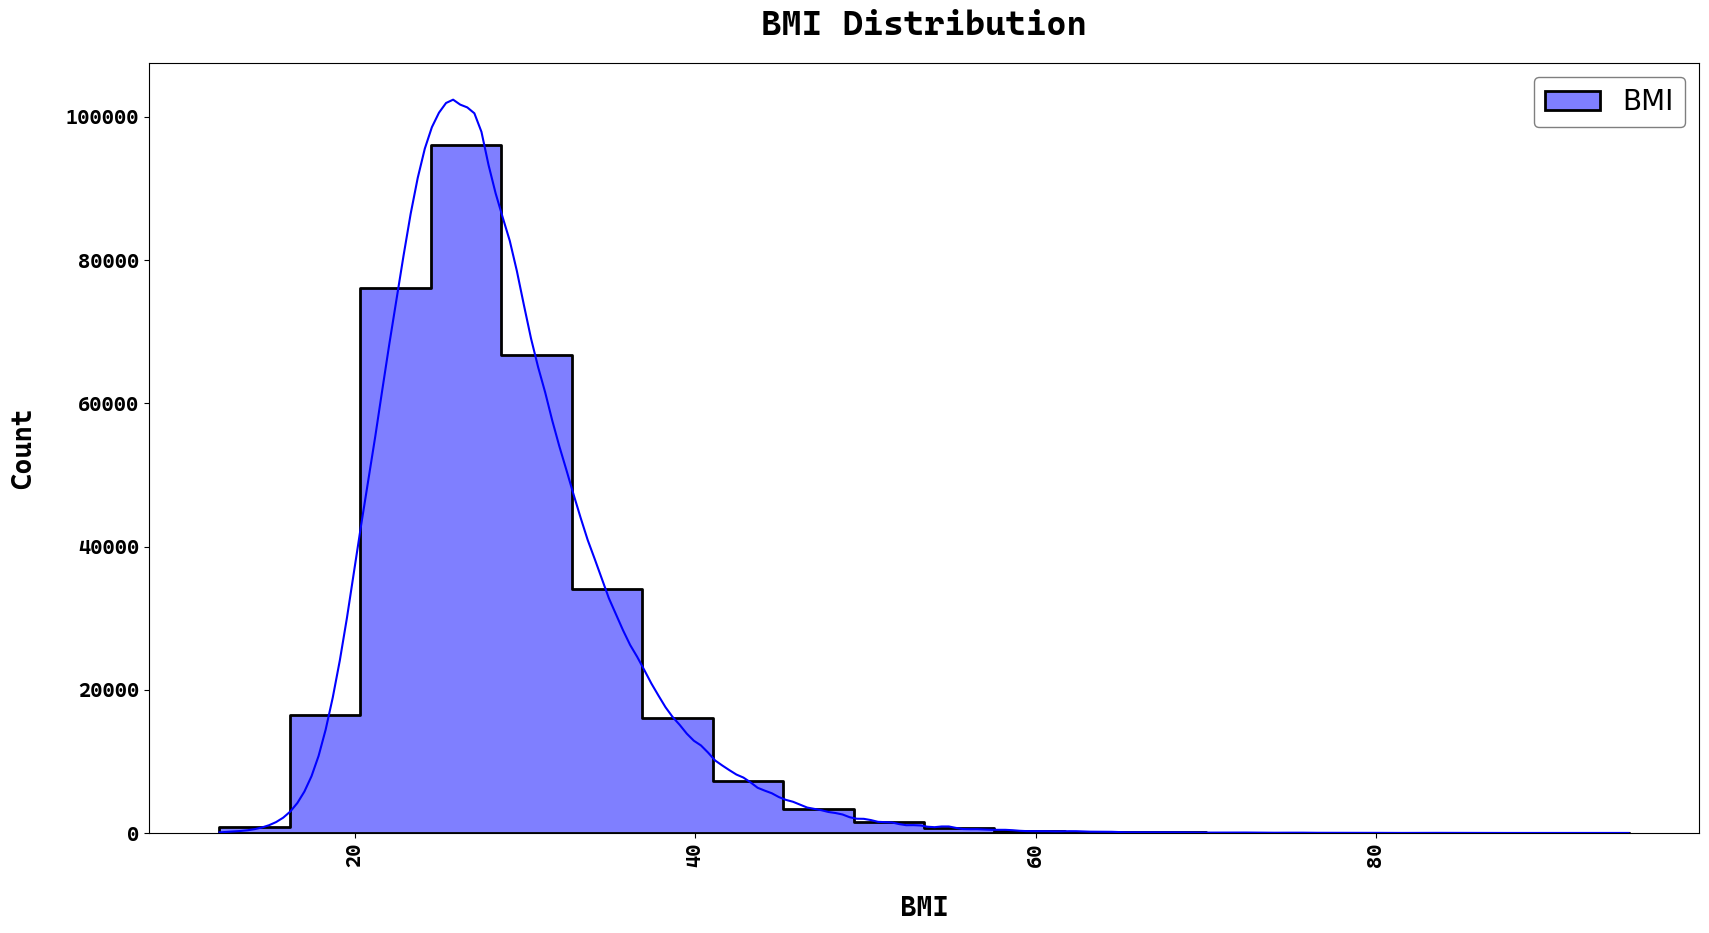

In [61]:
plt.figure(figsize = (20, 10))
sns.histplot(df['BMI'], kde = True, color = 'blue', bins = 20, edgecolor = 'black', linewidth = 2, alpha = 0.5, label = 'BMI', element = 'step', fill = True).set_title('BMI Distribution', fontsize = 25, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', loc = 'center', pad = 20)
plt.xlabel('BMI', fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', labelpad = 20)
plt.ylabel('Count', fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', labelpad = 20)
plt.xticks(fontsize = 15, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', rotation = 90)
plt.yticks(fontsize = 15, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black')
plt.legend(loc = 'upper right', fontsize = 20, facecolor = 'white', edgecolor = 'black', framealpha = 0.5)
plt.show()

### **`#3.2.2 Barplot`**

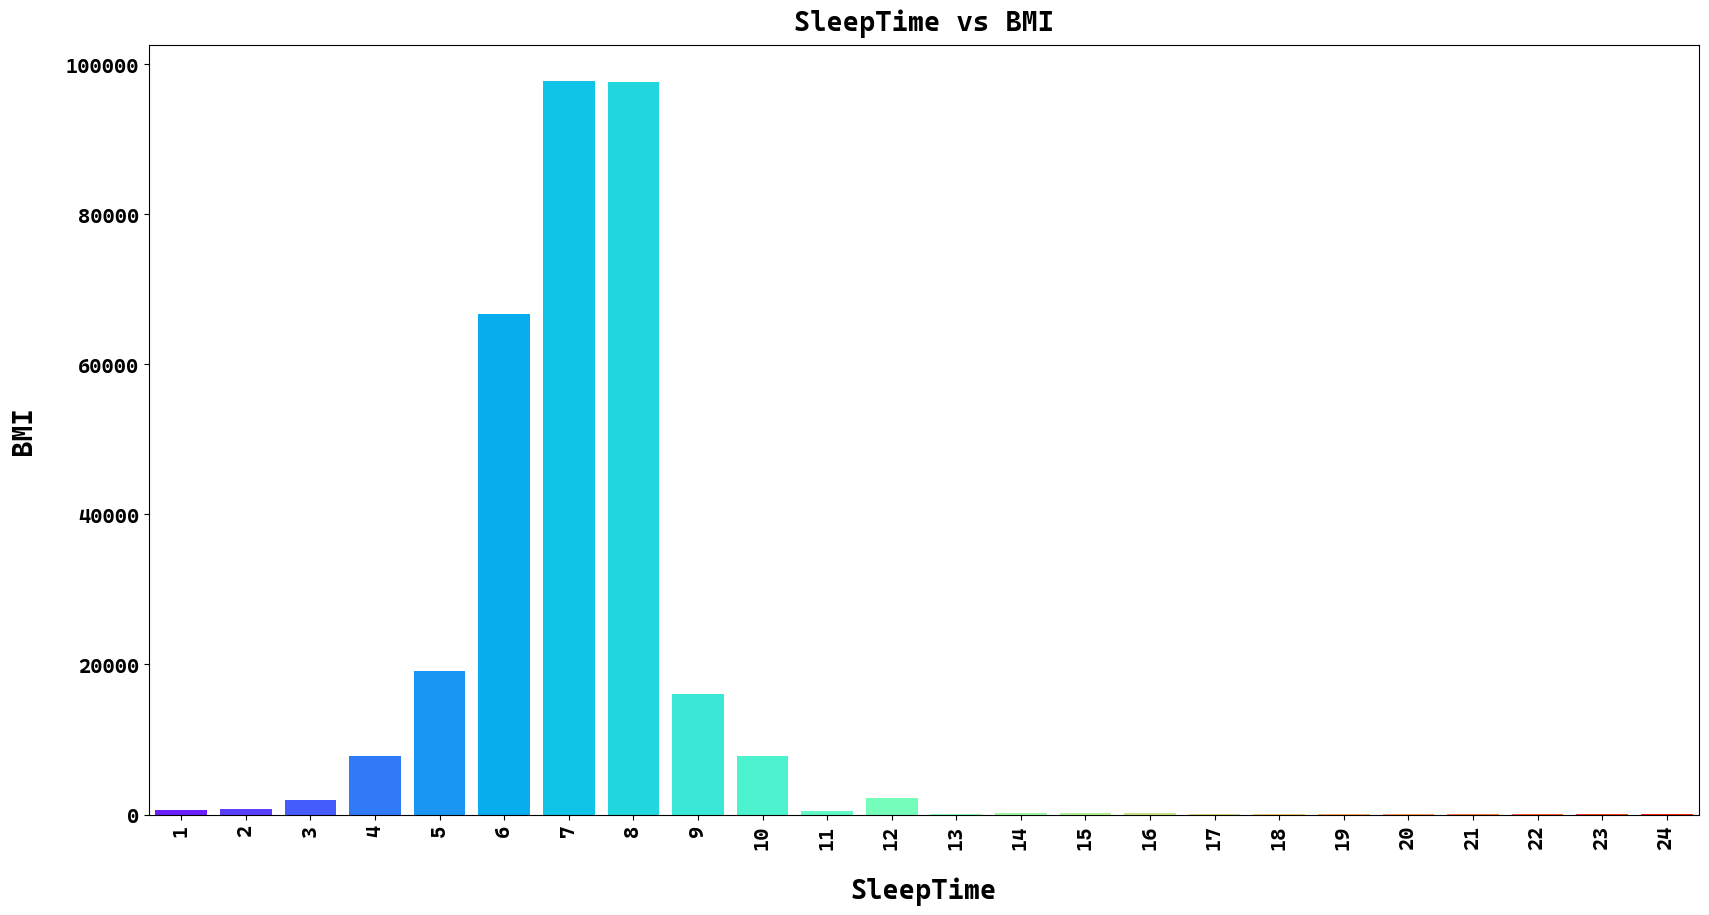

In [62]:
plt.figure(figsize = (20, 10))
sns.barplot(x = df['SleepTime'].value_counts().index, y = df['SleepTime'].value_counts().values, palette = 'rainbow', saturation = 1.0, errcolor = 'black', errwidth = 2.0, capsize = 0.2).set_title('SleepTime vs BMI', fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', loc = 'center', pad = 10.0, weight = 'bold')
plt.xlabel('SleepTime', fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', labelpad = 20)
plt.ylabel('BMI', fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', labelpad = 20)
plt.xticks(fontsize = 15, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', rotation = 90)
plt.yticks(fontsize = 15, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black')
plt.show()

### **`#3.2.3 Boxplot`**

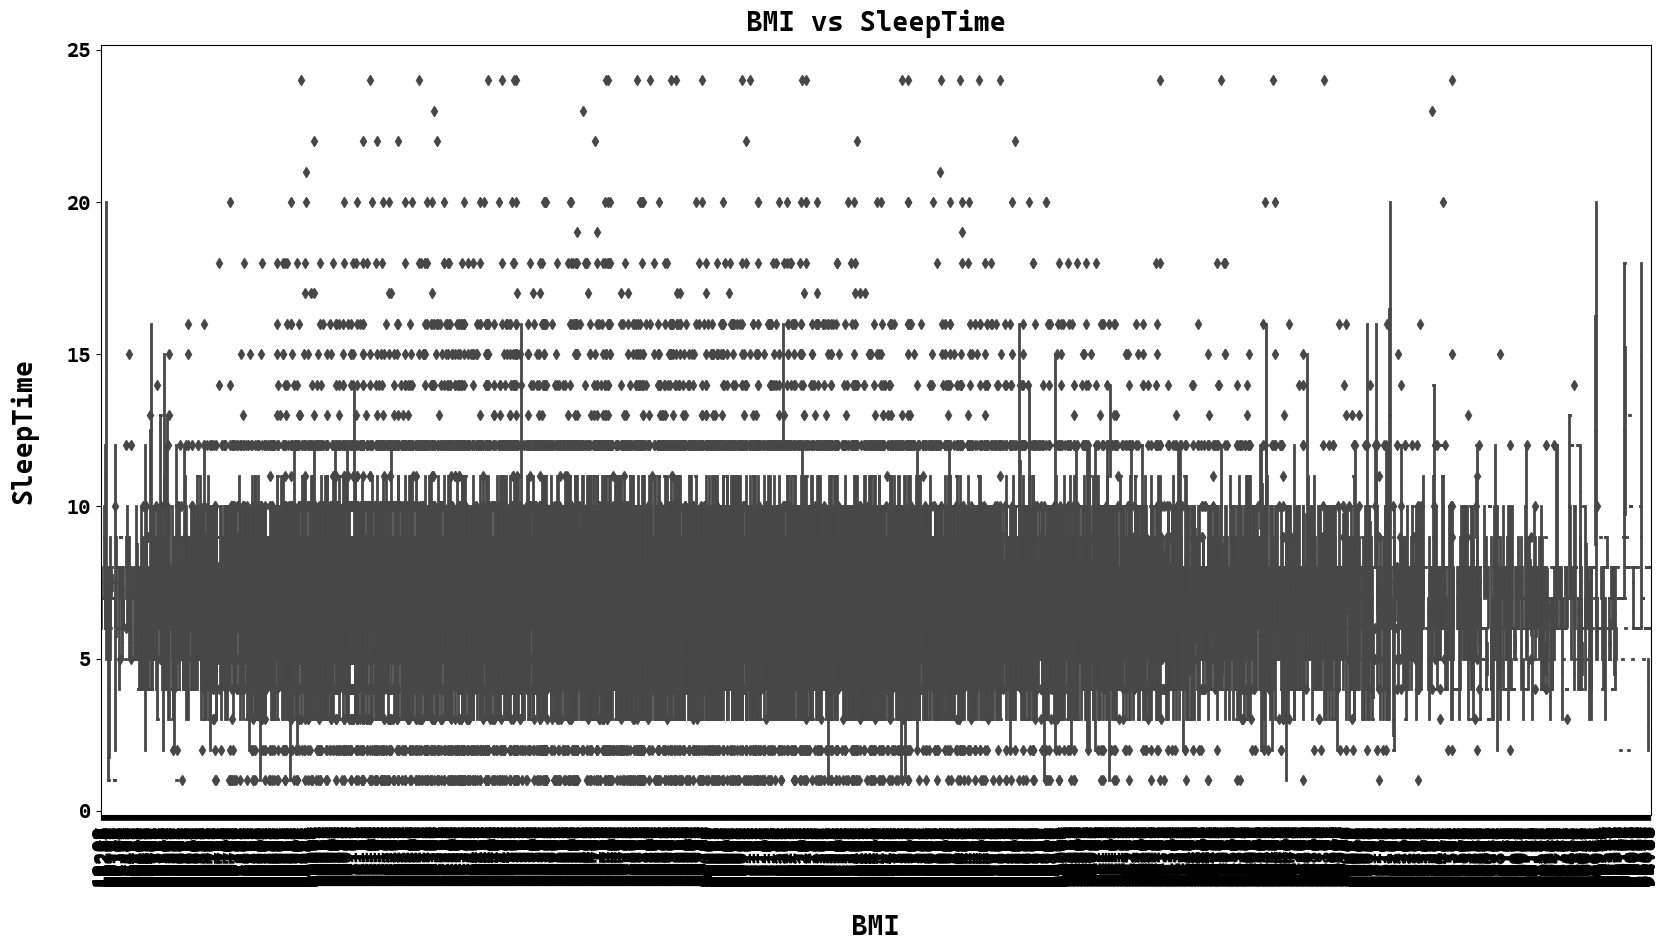

In [63]:
plt.figure(figsize = (20, 10))
sns.boxplot(x = df['BMI'], y = df['SleepTime'], data = df, palette = 'rainbow', saturation = 1.0, width = 0.8, fliersize = 5.0, linewidth = 2.0, whis = 1.5).set_title('BMI vs SleepTime', fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', loc = 'center', pad = 10.0, weight = 'bold')
plt.xlabel('BMI', fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', labelpad = 20)
plt.ylabel('SleepTime', fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', labelpad = 20)
plt.xticks(fontsize = 15, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', rotation = 90)
plt.yticks(fontsize = 15, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black')
plt.show()

### **`#3.2.4 Scatterplot`**

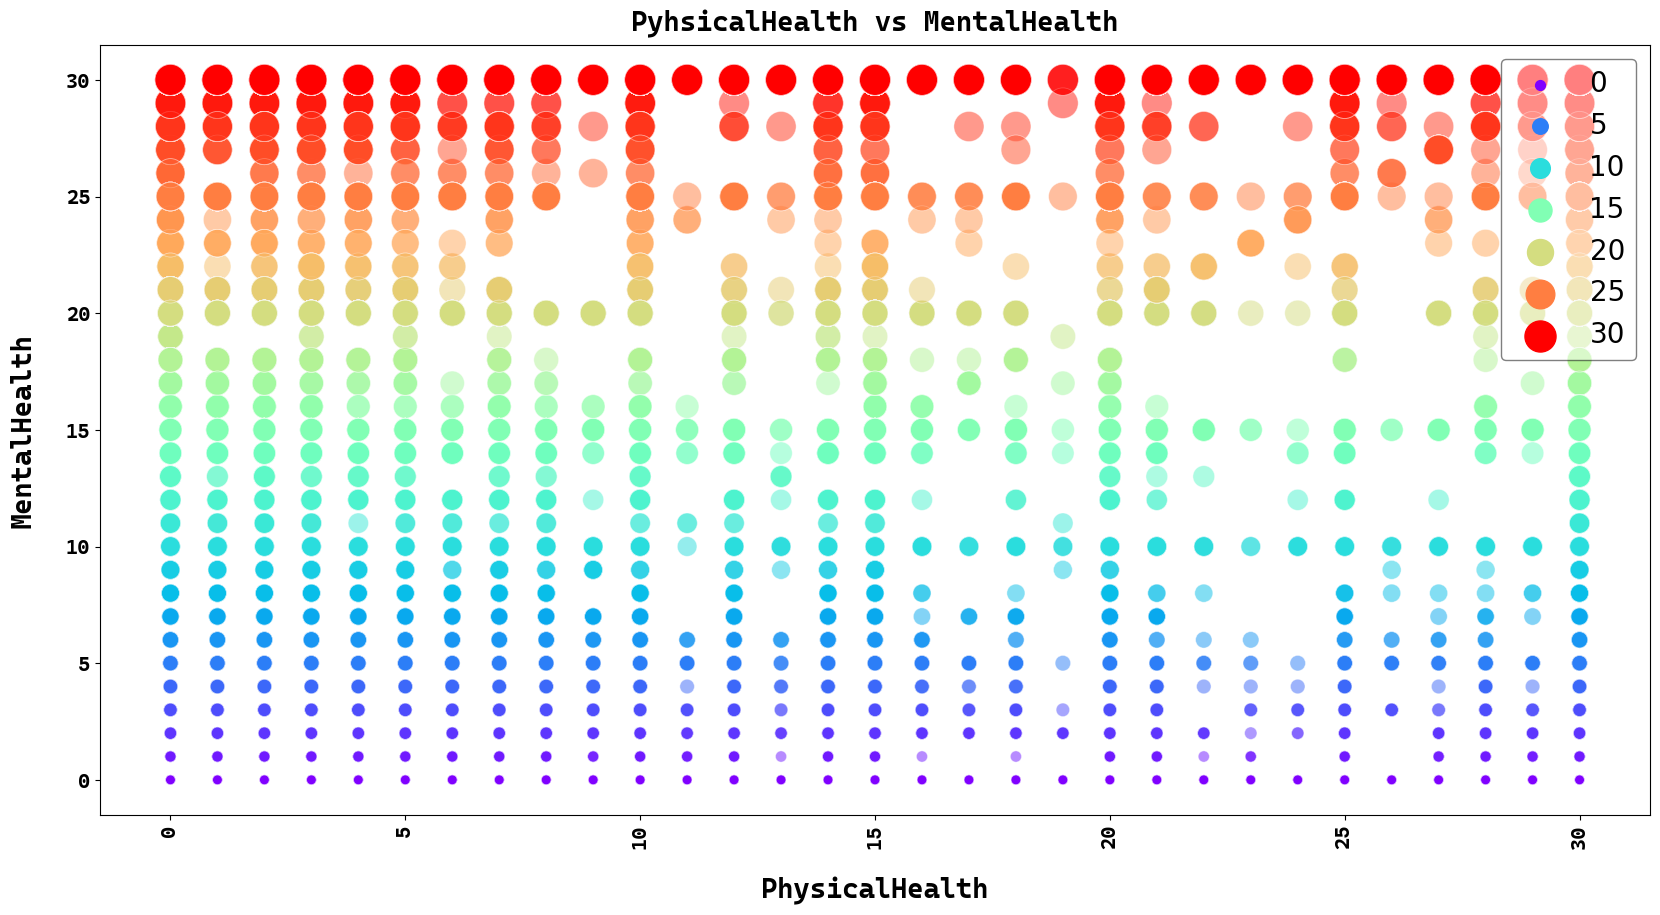

In [64]:
plt.figure(figsize = (20, 10))
sns.scatterplot(x = df['PhysicalHealth'], y = df['MentalHealth'], data = df, palette = 'rainbow', hue = df['MentalHealth'], size = df['MentalHealth'], sizes = (50, 500), alpha = 0.5).set_title('PyhsicalHealth vs MentalHealth', fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', loc = 'center', pad = 10.0, weight = 'bold')
plt.xlabel('PhysicalHealth', fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', labelpad = 20)
plt.ylabel('MentalHealth', fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', labelpad = 20)
plt.xticks(fontsize = 15, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', rotation = 90)
plt.yticks(fontsize = 15, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black')
plt.legend(loc = 'upper right', fontsize = 20, facecolor = 'white', edgecolor = 'black', framealpha = 0.5)
plt.show()

### **`#3.2.5 Heatmap`**

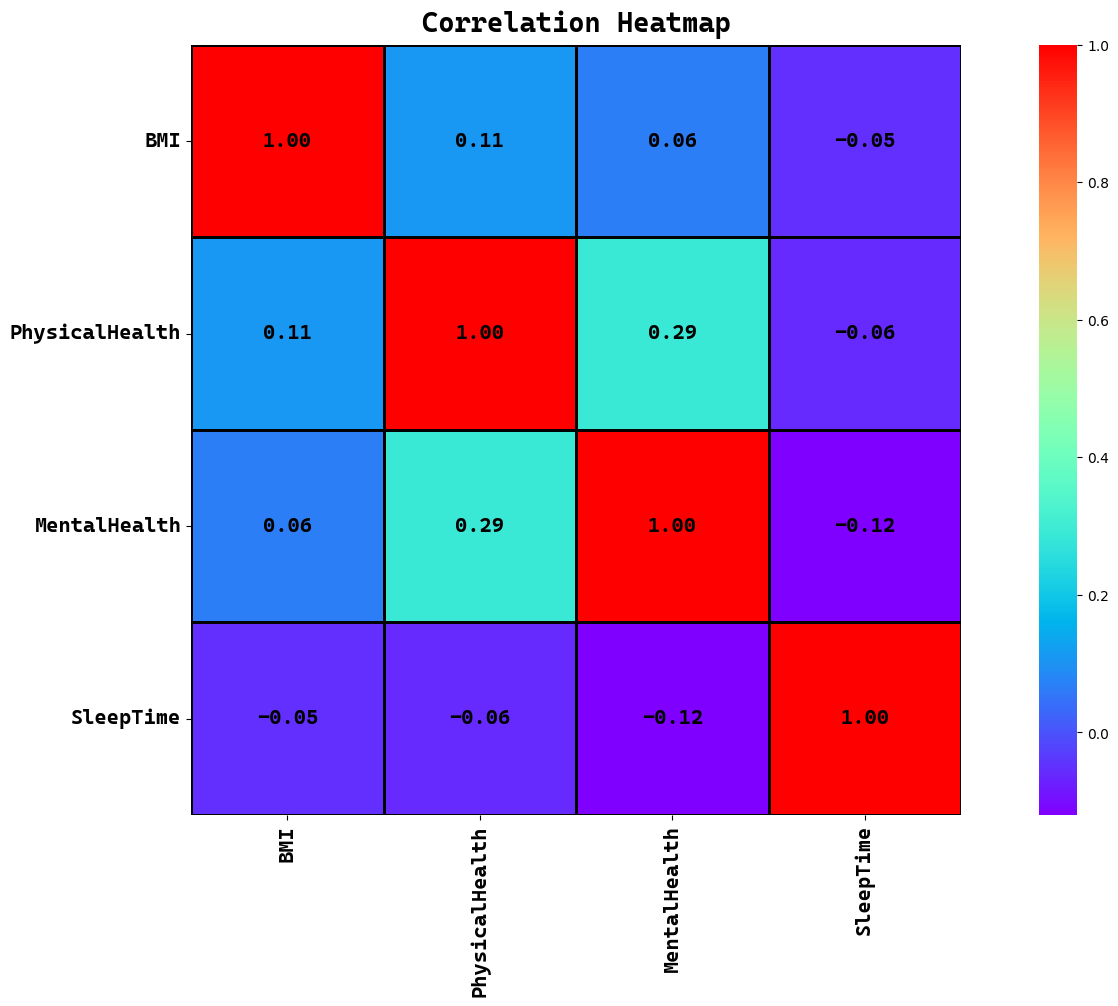

In [65]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(numeric_only = True), cmap = 'rainbow', annot = True, linewidth = 2.0, linecolor = 'black', annot_kws = {'fontsize': 15, 'fontweight': 'bold', 'fontname': 'Cascadia Code', 'color': 'black'}, fmt = '.2f', cbar = True, square = True).set_title('Correlation Heatmap', fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', loc = 'center', pad = 10.0, weight = 'bold')
plt.xticks(fontsize = 15, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', rotation = 90)
plt.yticks(fontsize = 15, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', rotation = 0)
plt.show()

## **`#4 Data Cleaning and Preprocessing`**

### **`#4.1 Handling Missing Values`**

In [66]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

*`[NO MISSING VALUES DETECTED]`*

### **`#4.2 Handling Duplicates`**

In [67]:
df.duplicated().sum()

18078

In [68]:
df.drop_duplicates(inplace = True)

In [69]:
df.shape

(301717, 18)

### **`#4.3 Feature Scaling`**

#### **`#4.3.1 Min-Max Scaling`**

In [70]:
mm = MinMaxScaler(feature_range = (0, 1))

In [71]:
df['BMI'] = mm.fit_transform(df[['BMI']])
df['PhysicalHealth'] = mm.fit_transform(df[['PhysicalHealth']])
df['MentalHealth'] = mm.fit_transform(df[['MentalHealth']])
df['SleepTime'] = mm.fit_transform(df[['SleepTime']])

In [72]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,0.055294,Yes,No,No,0.100000,1.0,No,Female,55-59,White,Yes,Yes,Very good,0.173913,Yes,No,Yes
1,No,0.100447,No,No,Yes,0.000000,0.0,No,Female,80 or older,White,No,Yes,Very good,0.260870,No,No,No
2,No,0.175782,Yes,No,No,0.666667,1.0,No,Male,65-69,White,Yes,Yes,Fair,0.304348,Yes,No,No
3,No,0.147169,No,No,No,0.000000,0.0,No,Female,75-79,White,No,No,Good,0.217391,No,No,Yes
4,No,0.141132,No,No,No,0.933333,0.0,Yes,Female,40-44,White,No,Yes,Very good,0.304348,No,No,No


### **`#4.4 Handling Categorical Variables`**

#### **`#4.4.1 Label Encoding`**

In [73]:
le = LabelEncoder()

In [74]:
for col in df.columns:
    if is_num(df[col]):
        continue
    else:
        df[col] = le.fit_transform(df[col])

In [75]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.055294,1,0,0,0.100000,1.0,0,0,7,5,2,1,4,0.173913,1,0,1
1,0,0.100447,0,0,1,0.000000,0.0,0,0,12,5,0,1,4,0.260870,0,0,0
2,0,0.175782,1,0,0,0.666667,1.0,0,1,9,5,2,1,1,0.304348,1,0,0
3,0,0.147169,0,0,0,0.000000,0.0,0,0,11,5,0,0,2,0.217391,0,0,1
4,0,0.141132,0,0,0,0.933333,0.0,1,0,4,5,0,1,4,0.304348,0,0,0


### **`#4.5 Removing Irrelevant or Redundant Features`**

*`[NO IRREGULAR OR REDUNDANT FEATURES HAS BEEN FOUND]`*

## **`#5 Spliting the dataset`**

In [76]:
x = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

## **`#6 Handling Class Imbalance`**

In [77]:
df['HeartDisease'].value_counts()

HeartDisease
0    274456
1     27261
Name: count, dtype: int64

In [78]:
not_heart_disease = (274456 / (27261 + 274456)) * 100
yes_heart_disease = (27261 / (27261 + 274456)) * 100
print('Not Heart Disease {} percent of total people.'.format(not_heart_disease))
print('Heart Disease {} percent of total people.'.format(yes_heart_disease))

Not Heart Disease 90.96471196518591 percent of total people.
Heart Disease 9.03528803481408 percent of total people.


*`[As the the imbalance is more than 80/20, it is a full imbalance]`*

### **`#5.1 Near Miss For Under Sampling`**

In [79]:
nm = NearMiss()

In [80]:
y.value_counts()

HeartDisease
0    274456
1     27261
Name: count, dtype: int64

In [81]:
nm_x, nm_y = nm.fit_resample(x, y)

In [82]:
nm_y.value_counts()

HeartDisease
0    27261
1    27261
Name: count, dtype: int64

### **`#5.2 Stratified KFold Cross Validation`**

In [83]:
xtrain, xtest, ytrain, ytest = tts(nm_x, nm_y, test_size = 0.3, random_state = 42)

In [84]:
st = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

In [85]:
for xtrain_index, xtest_index in st.split(nm_x, nm_y):
    xtrain, xtest = nm_x.iloc[xtrain_index], nm_x.iloc[xtest_index]
    ytrain, ytest = nm_y.iloc[xtrain_index], nm_y.iloc[xtest_index]

## **`#7 Feature Selection`**

### **`#7.1 Select K Best`**

In [86]:
skb = SelectKBest(score_func = fcf)

In [87]:
feature_score = skb.fit(nm_x, nm_y)

In [88]:
feature_score.scores_

array([3.41765997e+03, 1.66363140e+03, 8.38309132e+02, 4.93876635e+03,
       1.24148765e+04, 6.90927920e+03, 1.34748111e+04, 1.34197552e+02,
       2.58431672e+00, 4.57349393e+03, 7.60356093e+03, 8.01081174e+03,
       1.00070387e+03, 2.49786868e+02, 5.05597799e+03, 3.76844403e+03,
       6.33648954e+02])

In [89]:
col1 = pd.DataFrame(feature_score.scores_, columns = ['Feature Score'])
col2 = pd.DataFrame(nm_x.columns, columns = ['Feature Name'])
score = pd.concat([col1, col2], axis = 1)
score

,Feature Score,Feature Name
0,3417.659975,BMI
1,1663.631400,Smoking
2,838.309132,AlcoholDrinking
3,4938.766355,Stroke
4,12414.876540,PhysicalHealth
5,6909.279197,MentalHealth
6,13474.811102,DiffWalking
7,134.197552,Sex
8,2.584317,AgeCategory
9,4573.493931,Race


In [90]:
score_sort = score.sort_values(by = 'Feature Score', ascending = False)
score_sort

,Feature Score,Feature Name
6,13474.811102,DiffWalking
4,12414.876540,PhysicalHealth
11,8010.811738,PhysicalActivity
10,7603.560927,Diabetic
5,6909.279197,MentalHealth
14,5055.977995,Asthma
3,4938.766355,Stroke
9,4573.493931,Race
15,3768.444029,KidneyDisease
0,3417.659975,BMI


### **`#7.2 Selecting The Best Feature`**

In [44]:
score_sort.head(10)

,Feature Score,Feature Name
6,13474.811102,DiffWalking
4,12414.876540,PhysicalHealth
11,8010.811738,PhysicalActivity
10,7603.560927,Diabetic
5,6909.279197,MentalHealth
14,5055.977995,Asthma
3,4938.766355,Stroke
9,4573.493931,Race
15,3768.444029,KidneyDisease
0,3417.659975,BMI


In [92]:
nm_x = nm_x[['DiffWalking']]

In [93]:
nm_x.head()

,DiffWalking
0,0
1,0
2,0
3,0
4,0


In [100]:
xtrain, xtest, ytrain, ytest = tts(nm_x, nm_y, test_size = 0.3, random_state = 42)

**After sorting all the Feature Scores, we can say that,** ***`DiffWalking`*** **has the most significate effect on the likelihood of heart disease** ***`with the most feature score of 13474.811102.`*** **Then** ***` PhysicalHealth, PhysicalActivity, Diabetic, MentalHealth, Asthma, Stroke, Race, KidneyDisease, BMI, etc respectively`*** **have a significate effect on the likelihood of heart disease after** ***` DiffWalking`***

## **`#8 Model Selection and Training`**

### **`#8.1 Model Training`**

#### **`#8.1.1 Logistic Regression`**

In [101]:
log = LogisticRegression()

In [102]:
log.fit(xtrain, ytrain)

LogisticRegression()

In [103]:
log_pred = log.predict(xtest)
log_pred

array([0, 1, 0, ..., 1, 1, 1])

In [104]:
log_acc = acc(ytest, log_pred)
log_acc

0.6784862749893013

#### **`#8.1.2 Random Forest Classification`**

In [105]:
rf = RandomForestClassifier()

In [106]:
rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [107]:
rf_pred = rf.predict(xtest)
rf_pred

array([0, 1, 0, ..., 1, 1, 1])

In [108]:
rf_acc = acc(ytest, rf_pred)
rf_acc

0.6784862749893013

#### **`#8.1.3 Bernoulli Naive Bayes Classifier`**

In [109]:
bnb = BernoulliNB()

In [110]:
bnb.fit(xtrain, ytrain)

BernoulliNB()

In [111]:
bnb_pred = bnb.predict(xtest)
bnb_pred

array([0, 1, 0, ..., 1, 1, 1])

In [112]:
bnb_acc = acc(ytest, bnb_pred)
bnb_acc

0.6784862749893013

#### **`#8.1.4 Gaussian Naive Bayes Classifier`**

In [113]:
gnb = GaussianNB()

In [114]:
gnb.fit(xtrain, ytrain)

GaussianNB()

In [115]:
gnb_pred = gnb.predict(xtest)
gnb_pred

array([0, 1, 0, ..., 1, 1, 1])

In [116]:
gnb_acc = acc(ytest, gnb_pred)
gnb_acc

0.6784862749893013

#### **`#8.1.4 Multinomial Naive Bayes Classifier`**

In [117]:
mnb = MultinomialNB()

In [118]:
mnb.fit(xtrain, ytrain)

MultinomialNB()

In [119]:
mnb_pred = mnb.predict(xtest)
mnb_pred

array([0, 0, 0, ..., 0, 0, 0])

In [120]:
mnb_acc = acc(ytest, mnb_pred)
mnb_acc

0.49978602433209024

#### **`#8.1.6 K-Nearest Neighbors Classifier`**

In [121]:
knn = KNeighborsClassifier()

In [122]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [123]:
knn_pred = knn.predict(xtest)
knn_pred

array([1, 1, 1, ..., 1, 1, 1])

In [124]:
knn_acc = acc(ytest, knn_pred)
knn_acc

0.5002139756679098

#### **`#8.1.7 Decision Tree Classifier`**

In [125]:
dt = DecisionTreeClassifier()

In [126]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [127]:
dt_pred = dt.predict(xtest)
dt_pred

array([0, 1, 0, ..., 1, 1, 1])

In [128]:
dt_acc = acc(ytest, dt_pred)
dt_acc

0.6784862749893013

### **`#8.2 Model Selection`**

In [129]:
compare_acc = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest', 'Bernoulli Naive Bayes', 'Gaussian Naive Bayes', 'Multinomial Naive Bayes', 'K Nearest Neighbors', 'Decision Tree'], 'Accuracy': [log_acc, rf_acc, bnb_acc, gnb_acc, mnb_acc, knn_acc, dt_acc]})
compare_acc

,Model,Accuracy
0,Logistic Regression,0.678486
1,Random Forest,0.678486
2,Bernoulli Naive Bayes,0.678486
3,Gaussian Naive Bayes,0.678486
4,Multinomial Naive Bayes,0.499786
5,K Nearest Neighbors,0.500214
6,Decision Tree,0.678486


In [130]:
compare_acc_sort = compare_acc.sort_values(by = 'Accuracy', ascending = False)
compare_acc_sort

,Model,Accuracy
0,Logistic Regression,0.678486
1,Random Forest,0.678486
2,Bernoulli Naive Bayes,0.678486
3,Gaussian Naive Bayes,0.678486
6,Decision Tree,0.678486
5,K Nearest Neighbors,0.500214
4,Multinomial Naive Bayes,0.499786


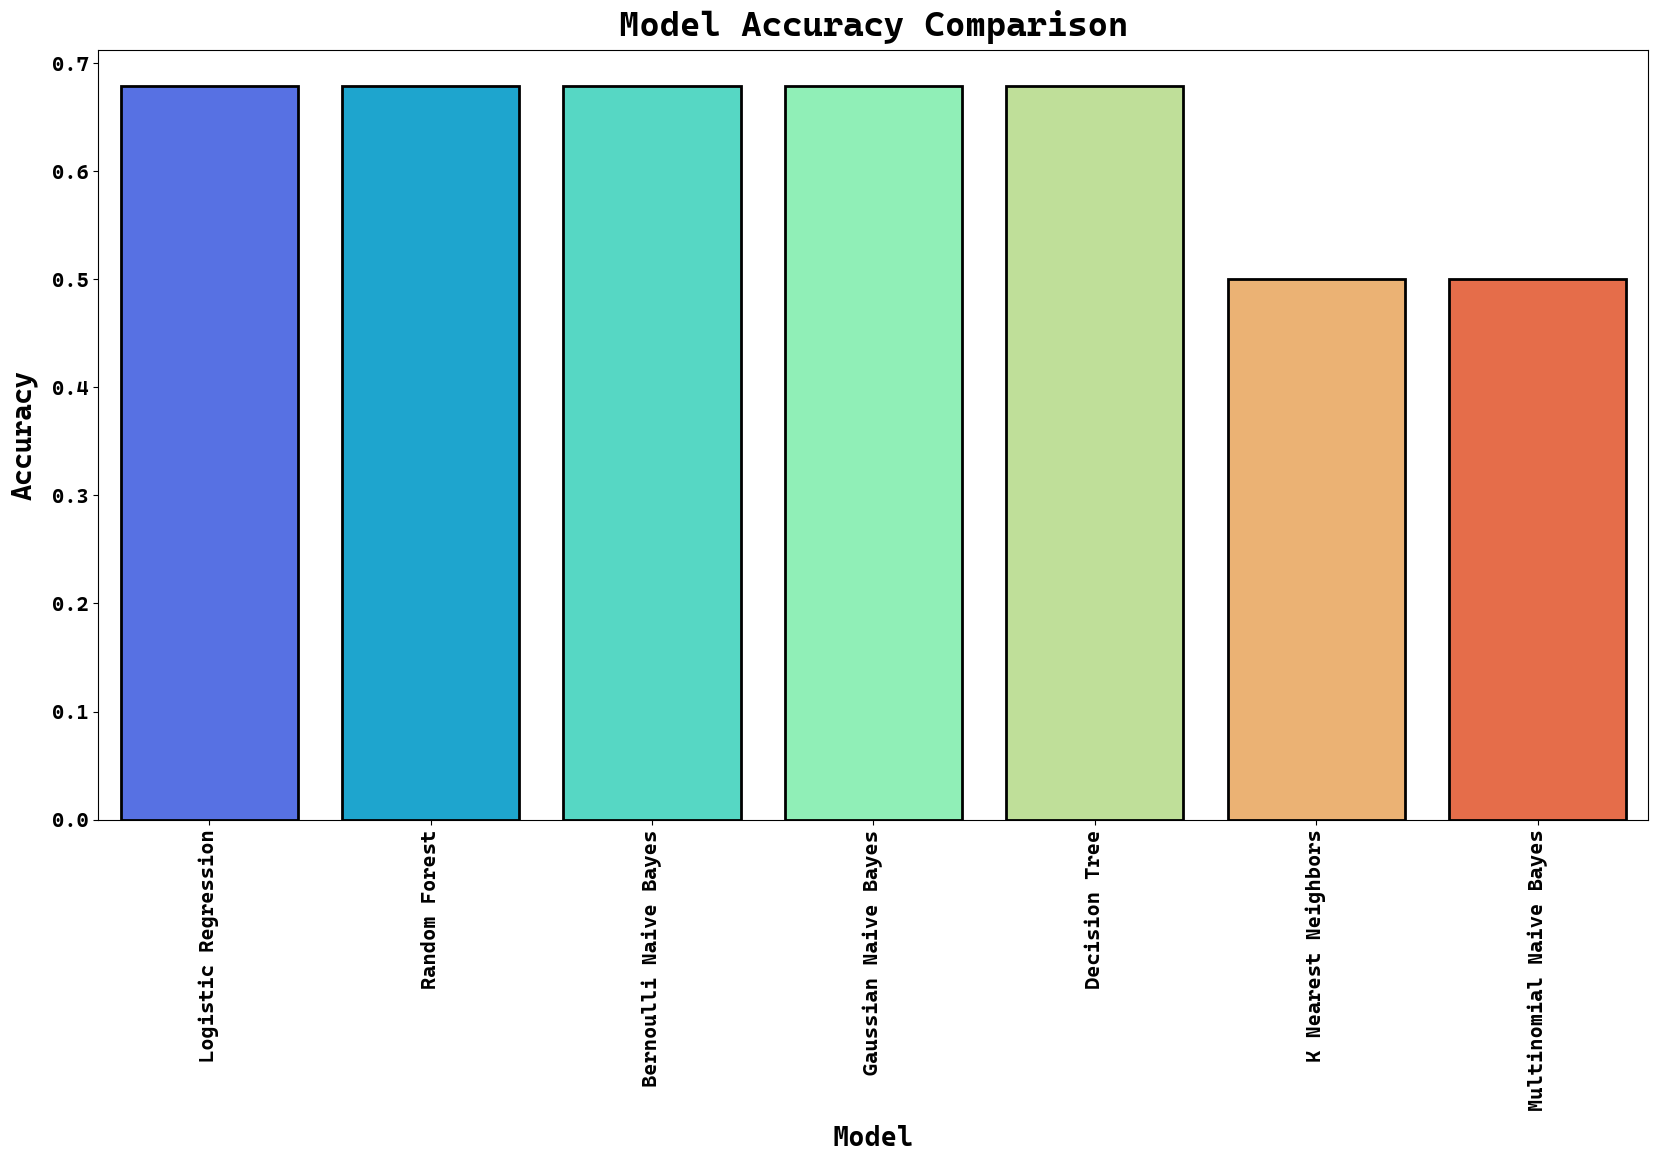

In [131]:
plt.figure(figsize = (20, 10))
sns.barplot(x = 'Model', y = 'Accuracy', data = compare_acc_sort, palette = 'rainbow', edgecolor = 'black', linewidth = 2.0).set_title('Model Accuracy Comparison', fontsize = 25, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', loc = 'center', pad = 10.0, weight = 'bold')
plt.xlabel('Model', fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', labelpad = 10.0)
plt.ylabel('Accuracy', fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', labelpad = 10.0)
plt.xticks(fontsize = 15, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', rotation = 90)
plt.yticks(fontsize = 15, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', rotation = 0)
plt.show()

**After evaluating all the Machine Learning Model's Accuracy results. We can say that,** ***`Logistic Regression, Random Forest, Bernoulli Naive Bayes, Gaussian Naive Bayes and Decision Tree `*** **are the best-perfoming Model having** ***` the most accuracy `*** **than other two machine learning models.**

## **`#10 Final Model and Deployment`**

In [147]:
jb.dump(rf, 'heart_disease_model')

['heart_disease_model']

In [148]:
model = jb.load('heart_disease_model')

In [150]:
def predict_heart_disease(nm_x):
    HeartDisease = model.predict([[nm_x]])
    return HeartDisease

In [152]:
interface = gr.Interface(
    fn = predict_heart_disease,
    inputs = ['number'],
    outputs = ['number']
).launch(share = False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
